In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.
Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-09 20:12:51.210236: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-09 20:12:51.210499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)  #one element representing 32 images

68

In [6]:
68*32  #we had total of 2152 images but showing 2176  because last batch i.e. 68th one  must have had  less than 32 images

2176

In [7]:
for image_batch, label_batch in dataset.take(1): #take(1) gives you one batch i.e. 32 images
    print(image_batch.shape)  #image_batch, label_batch are tensors hence neede to convert with numpy
    print(label_batch.numpy())


2023-03-09 20:12:51.415489: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 256, 256, 3)
[0 2 0 0 1 2 2 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 2 1 0 1 0 1 0 1 0]


(32, 256, 256, 3) represents (batch-size, image-size x image_size, 3 -> RGB i.e. 3 channels)


[1 2 1 1 2 1 1 1 1 0]  here 0 -> 'Potato___Early_blight'  1 -> 'Potato___Late_blight' 2 -> 'Potato___healthy'

In [8]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch[0]) # this will give 1st images in 1st batch as tensor

tf.Tensor(
[[[158. 122. 122.]
  [157. 121. 121.]
  [157. 121. 121.]
  ...
  [162. 136. 135.]
  [162. 136. 135.]
  [161. 135. 134.]]

 [[145. 109. 109.]
  [148. 112. 112.]
  [151. 115. 115.]
  ...
  [168. 142. 141.]
  [168. 142. 141.]
  [165. 139. 138.]]

 [[151. 115. 115.]
  [156. 120. 120.]
  [160. 124. 124.]
  ...
  [175. 149. 148.]
  [173. 147. 146.]
  [166. 140. 139.]]

 ...

 [[ 70.  46.  46.]
  [ 69.  45.  45.]
  [ 68.  44.  44.]
  ...
  [158. 136. 138.]
  [163. 141. 143.]
  [154. 132. 134.]]

 [[ 71.  47.  47.]
  [ 70.  46.  46.]
  [ 69.  45.  45.]
  ...
  [161. 139. 141.]
  [168. 146. 148.]
  [159. 137. 139.]]

 [[ 72.  48.  48.]
  [ 71.  47.  47.]
  [ 69.  45.  45.]
  ...
  [159. 137. 139.]
  [165. 143. 145.]
  [155. 133. 135.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch[0].numpy()) # this will give 1st images in 1st batch  as RGB values(0-255)

[[[188. 190. 203.]
  [160. 162. 175.]
  [176. 178. 191.]
  ...
  [100. 101. 121.]
  [148. 149. 169.]
  [145. 146. 166.]]

 [[175. 177. 190.]
  [144. 146. 159.]
  [177. 179. 192.]
  ...
  [131. 132. 152.]
  [133. 134. 154.]
  [155. 156. 176.]]

 [[183. 185. 198.]
  [202. 204. 217.]
  [166. 168. 181.]
  ...
  [144. 145. 165.]
  [155. 156. 176.]
  [130. 131. 151.]]

 ...

 [[172. 170. 183.]
  [175. 173. 186.]
  [188. 186. 199.]
  ...
  [117. 113. 127.]
  [124. 120. 134.]
  [109. 105. 119.]]

 [[189. 187. 200.]
  [190. 188. 201.]
  [192. 190. 203.]
  ...
  [122. 118. 132.]
  [129. 125. 139.]
  [115. 111. 125.]]

 [[177. 175. 188.]
  [156. 154. 167.]
  [169. 167. 180.]
  ...
  [104. 100. 114.]
  [127. 123. 137.]
  [118. 114. 128.]]]


lets see hoe to plot 

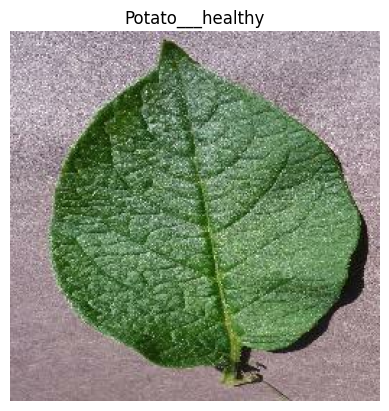

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8")) #eveytime you will see different images as it is shuffeling
    plt.title(class_names[label_batch[0]])  #will give which class it belongs to 
    plt.axis("off")

instead on 1 image , lets print 12 images

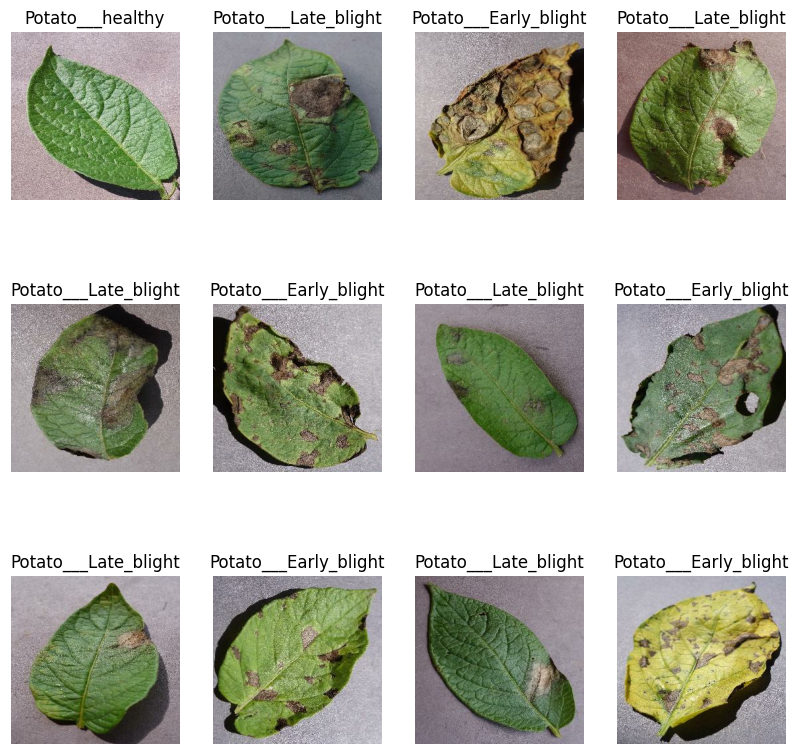

In [11]:
plt.figure(figsize=(10,10))  # to print image as 10x10 dimension
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)   # to print as 3x4 matrix 
        plt.imshow(image_batch[i].numpy().astype("uint8")) #eveytime you will see different images as it is shuffeling
        plt.title(class_names[label_batch[i]])  #will give which class it belongs to 
        plt.axis("off")

80% ==> training
20% ==> 10% validation, 10% test

//validation will be used during training
// after each epoch , we will do validation on 10% data in validation folder
// after 50 epochs i.e after complete training then we use test data set  -> to measure the accuracy of our model

In [12]:
train_size = 0.8  # for 80% data
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54) # take first 54 batches as train_dataset
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)  # that means you are skipping 1st 54 batches i.e 54 onwards 
len(test_ds) # this is not test_dataset actually , just saving temporarily

14

In [15]:
val_size = 0.1 # 10% validadtion dataset
len(dataset)*val_size #this will give how many batches to store in validation_data_set -> here answer is 6.8 i.e. 6

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6) #this will be our actuall test data set
len(test_ds)

8

In above cells, we are done with splitting data into  training, validation, testing set

Now below we will write / define a function to all above task 

In [18]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True,shuffle_size = 10000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    ds_size = len(ds)
    train_size = int(train_split*ds_size)  # covertinf to int, we dont want float numbers
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Results are Same as above cell, where we did once calculations

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)


6

In [22]:
len(test_ds)

8

prefetch(buffer_size=tf.data.AUTOTUNE)  this mean tensorflow will decide how many batches to fetch from disk

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Now our dataset is optimized for training performance

Now we need to do some pre-processing

In [24]:
resize_and_rescale =  tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),  #see it on google (when predicting if image is not as per size we eill rescale to 256x256)
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
]) #this layer will eventually go to our ultimate model

now we will do some data augmentation // set on youtube ...
in short to make model robust , on any kind og imahe i.e Horizontal flip, contast change, rotation change, zoom change will cause no effect on our model prediction

In [25]:
data_augmentation =  tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In above two cells , we've just created layers untill now for pre-processing,
and we will use this layer in our actual model

Building Model Now , below using CNN
watch the video Simple Explanation of CNN V_23

layers.Conv2D(32 , (3,3), activation = 'relu',input_shape = input_shape)

32 -> number of hiddent layes i.e we want to extract 32 features  , we come up with 32 by trail and error
(3,3) -> filter size

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    #we will have set of layes here
    resize_and_rescale,  # 1st thing our model will do when we feed image to it
    data_augmentation ,  #2nd layer will do rotation, scaling
    layers.Conv2D(32 , (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),  # 64 neurons
    layers.Dense(n_classes, activation = 'softmax') #n_classes = 3 i.e 3 neurons we'll have #softmax will normalize probability of our classes

])
model.build(input_shape=input_shape)


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

Total params: 183,747 -> total weights we have to train

# So above we defined Neural Network Architecture
# then we do compile using optimizer e.g. ADAM

In [28]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] #in each epoh what type of metric will you use to track Gradient Descent
    # so here we are using accuracy to track training process

)

# below we will train our network

In [29]:
history = model.fit( 
    # we will record history of every epoch in history parameter to plot some charts
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds  # val_ds will help after each epoch to track accuracy
)

Epoch 1/50


2023-03-09 20:12:55.002860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - ETA: 0s - loss: 0.9146 - accuracy: 0.4896

2023-03-09 20:13:15.865923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 24s 378ms/step - loss: 0.9146 - accuracy: 0.4896 - val_loss: 0.8403 - val_accuracy: 0.5052
Epoch 2/50
35/54 [==================>...........] - ETA: 6s - loss: 0.7511 - accuracy: 0.6339

KeyboardInterrupt: 

# Lets figure out how well our trained model is performing on test dataset

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 59ms/step - loss: 0.1845 - accuracy: 0.9414


In [ ]:
scores

[0.18450969457626343, 0.94140625]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']  # its a python list of our training history

[0.5237268805503845,
 0.7280092835426331,
 0.8090277910232544,
 0.8582175970077515,
 0.8842592835426331,
 0.9027777910232544,
 0.9189814925193787,
 0.9380787014961243,
 0.9259259104728699,
 0.9525462985038757,
 0.9357638955116272,
 0.9577546119689941,
 0.9484953880310059,
 0.9496527910232544,
 0.9537037014961243,
 0.960069477558136,
 0.9629629850387573,
 0.9473379850387573,
 0.9519675970077515,
 0.9519675970077515,
 0.9606481790542603,
 0.9681712985038757,
 0.9704861044883728,
 0.9728009104728699,
 0.9768518805503845,
 0.9762731790542603,
 0.96875,
 0.9785879850387573,
 0.9866898059844971,
 0.9780092835426331,
 0.9652777910232544,
 0.9762731790542603,
 0.9837962985038757,
 0.9670138955116272,
 0.9872685074806213,
 0.9884259104728699,
 0.9849537014961243,
 0.9878472089767456,
 0.9826388955116272,
 0.9872685074806213,
 0.9930555820465088,
 0.9878472089767456,
 0.984375,
 0.9710648059844971,
 0.9814814925193787,
 0.9895833134651184,
 0.9878472089767456,
 0.9890046119689941,
 0.98611110448

In [ ]:
len(history.history['accuracy'])  #since we did 50 epochs


50

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Now lets plot loss and accuracy

Text(0.5, 1.0, 'Training and Validation Loss')

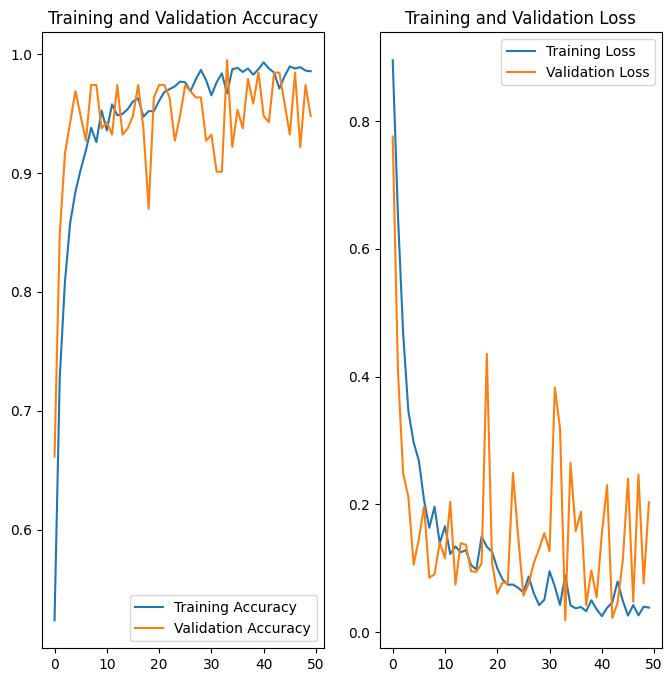

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# Now lets do prediction

First image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 175ms/step


2023-03-08 22:43:07.316490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Predicted label: Potato___Late_blight


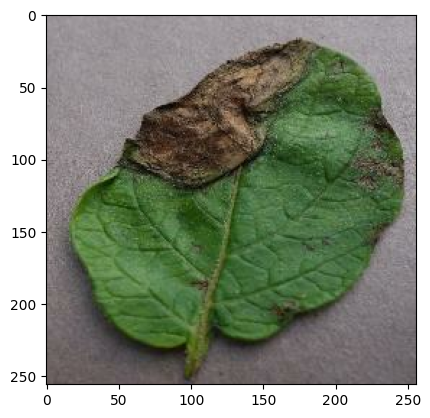

In [ ]:
import numpy as np
for image_batch, label_batch in test_ds.take(1): # we are taking 1st batch of images
   first_image = image_batch[0].numpy().astype('uint8') # we are considering 1st single image here
   first_label = label_batch[0].numpy()

   print("First image to predict")
   plt.imshow(first_image)
   print("actual label:",class_names[first_label])

   batch_prediction = model.predict(image_batch)  # this will store prediction of 1st image batch on batch_prediction
   print("Predicted label:",class_names[ np.argmax(batch_prediction[0]) ])  #batch_prediction[0] -> prediction of 1st image in batch


In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)  #Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[ np.argmax(predictions[0]) ]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        x = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted_Class: {predicted_class}, \n Confidence: {confidence}%.")
        plt.axis('off')

NameError: name 'plt' is not defined

In [ ]:
model_version = 2
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2/assets


INFO:tensorflow:Assets written to: ./models/2/assets


In [ ]:
import os
os.listdir("./models")  # it gives list of string 
model_version = max([int(i) for i in os.listdir("./models") + [0] ]) + 1  # convert list of string to list on int using list comprehension
model.save(f"./models/{model_version}")

NameError: name 'model' is not defined